There are a total of 9742 Movie's in our dataset with 100836 Users Rating the movie and 3683 Tags.
userId: Unique Id provided for each User

userId were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).
movieId: Unique Id provided for each Movie

Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL Movie Lens. Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).
rating (rating.csv): Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

All Ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user
Mean show the average rating is 3.2-Star
genres: Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth


In [3]:
ratings_df = pd.read_csv("./data/movies/ratings.csv")

# Preprocessing
ratings_df = ratings_df.groupby('movieId', as_index=False)['rating'].mean() # mean all users rating on each movies

ratings_df.head()

tags_df = pd.read_csv("./data/movies/tags.csv")

# Preprocessing
tags_df = tags_df.groupby('movieId', as_index=False)['tag'].agg(' '.join) # concate all users tagging on each movies

tags_df.head()

movies_df = pd.read_csv("./data/movies/movies.csv") 

# Preprocessing
movies_df['genres'] = movies_df['genres'].str.split('|')

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [4]:
data = pd.merge(movies_df, tags_df,on='movieId', how='left')
data = pd.merge(data, ratings_df , on='movieId', how='left')


data.head()

,movieId,title,genres,tag,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",pixar pixar fun,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",fantasy magic board game Robin Williams game,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",moldy old,3.259615
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",NaN,2.357143
4,5,Father of the Bride Part II (1995),[Comedy],pregnancy remake,3.071429


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   tag      1572 non-null   object 
 4   rating   9724 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 380.7+ KB


In [6]:

data.describe()

,movieId,rating
count,9742.000000,9724.000000
mean,42200.353623,3.262448
std,52160.494854,0.869874
min,1.000000,0.500000
25%,3248.250000,2.800000
50%,7300.000000,3.416667
75%,76232.000000,3.911765
max,193609.000000,5.000000


In [7]:
data.isnull().sum()

movieId       0
title         0
genres        0
tag        8170
rating       18
dtype: int64

In [8]:
data['tag'] = data['tag'].fillna("Unknown")
data['rating'] = data['rating'].fillna(0)

In [9]:

data

,movieId,title,genres,tag,rating
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",pixar pixar fun,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",fantasy magic board game Robin Williams game,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",moldy old,3.259615
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Unknown,2.357143
4,5,Father of the Bride Part II (1995),[Comedy],pregnancy remake,3.071429
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",Unknown,4.000000
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",Unknown,3.500000
9739,193585,Flint (2017),[Drama],Unknown,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",Unknown,3.500000


In [10]:
data.shape

(9742, 5)

In [11]:
itemFrequency = data['genres'].explode().value_counts().sort_values(ascending=False)
itemFrequency.head(10)


genres
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: count, dtype: int64

C:\Users\Vi\AppData\Local\Temp\ipykernel_20912\1045880281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=itemFrequency, y=itemFrequency.index, palette='muted')


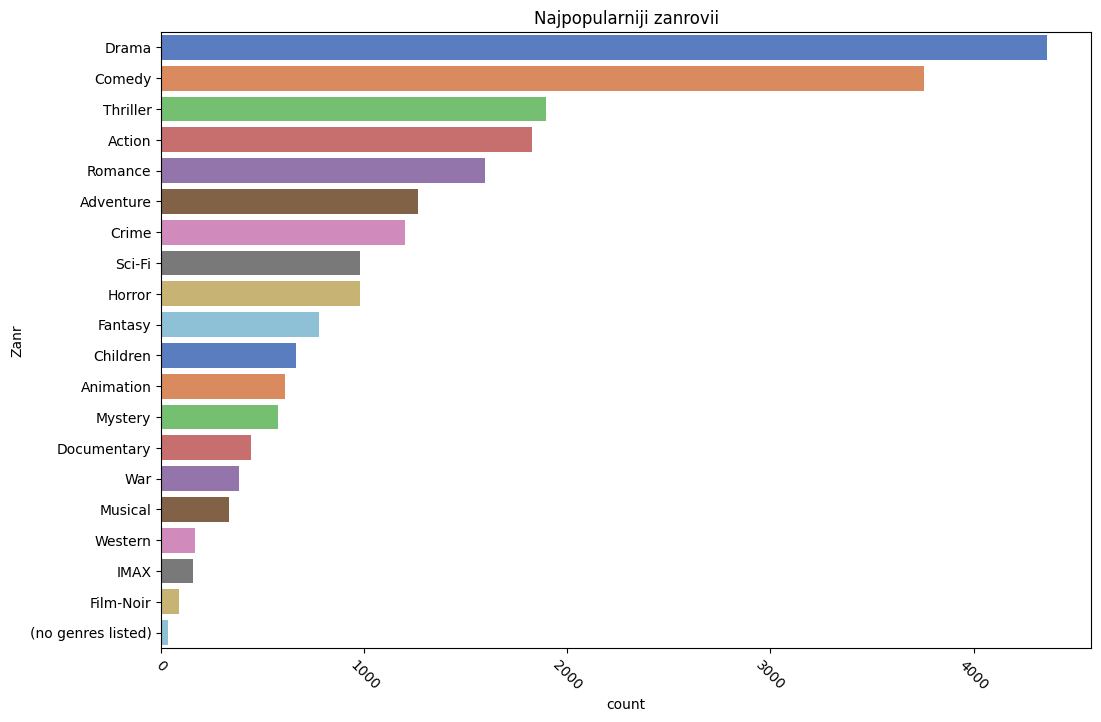

In [27]:

plt.figure(figsize=(12, 8))
sns.barplot(x=itemFrequency, y=itemFrequency.index, palette='muted')

plt.title('Najpopularniji zanrovii')
plt.ylabel('Zanr')

plt.xticks(rotation=-45)
plt.show()

C:\Users\Vi\AppData\Local\Temp\ipykernel_20912\2303076875.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['rating'], palette='muted')


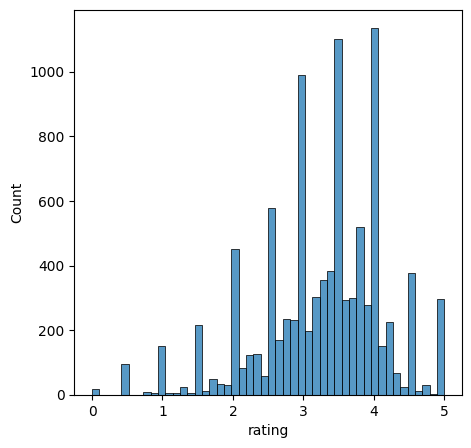

In [ ]:

plt.figure(figsize=(5,5))
sns.histplot(data['rating'])

plt.show()

In [ ]:
transactions=[]
for item in data['movieId'].unique():
    genres = data[data['movieId'] == item]['genres'].tolist()  
    flat_genres = [genre for sublist in genres for genre in sublist]  # Spajanje svih u jednu listu
    unique_genres = list(set(flat_genres))  # Pretvaranje u jedinstvenu listu
    transactions.append(unique_genres)

transactions[0:10]

[['Animation', 'Comedy', 'Fantasy', 'Adventure', 'Children'],
 ['Fantasy', 'Adventure', 'Children'],
 ['Romance', 'Comedy'],
 ['Romance', 'Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Thriller', 'Crime'],
 ['Romance', 'Comedy'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller']]

In [15]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
df = pd.DataFrame(encodedData, columns=te.columns_)
df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:

# Apriori algoritam
min_support_values = [0.02, 0.03]
min_confidence_values = [0.5, 0.6, 0.7, 0.8, 0.9]

best_avg_lift = 0
best_min_support = 0
best_min_confidence = 0 
# Traženje najboljih vrednosti za min_support i min_confidence
for min_support in min_support_values:
    for min_confidence in min_confidence_values:
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = min_confidence, num_itemsets=len(frequent_itemsets))
        avg_lift = rules["lift"].mean()
        print(f"Za min_support = {min_support} i min_confidence = {min_confidence} prosecni lift je {avg_lift}.")
        if avg_lift > best_avg_lift:
            best_avg_lift = avg_lift
            best_min_support = min_support
            best_min_confidence = min_confidence

print(f"Najbolji parametri su: min_support = {best_min_support}, i min_confidence = {best_min_confidence}.")


Za min_support = 0.02 i min_confidence = 0.5 prosecni lift je 1.8877621110735707.
Za min_support = 0.02 i min_confidence = 0.6 prosecni lift je 2.801204807151955.
Za min_support = 0.02 i min_confidence = 0.7 prosecni lift je 1.742669136599872.
Za min_support = 0.02 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.9 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.5 prosecni lift je 1.639758552812204.
Za min_support = 0.03 i min_confidence = 0.6 prosecni lift je 2.4601988241201895.
Za min_support = 0.03 i min_confidence = 0.7 prosecni lift je 1.742669136599872.
Za min_support = 0.03 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.9 prosecni lift je nan.
Najbolji parametri su: min_support = 0.02, i min_confidence = 0.6.


In [17]:
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=len(frequent_itemsets))
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,War,Drama,0.039212,0.447649,0.030589,0.780105,1.742669,1.0,0.013036,2.511880,0.443560,0.067042,0.601892,0.424219
1,Mystery,Thriller,0.058817,0.194416,0.036338,0.617801,3.177729,1.0,0.024902,2.107761,0.728137,0.167534,0.525563,0.402354
2,Sci-Fi,Action,0.031410,0.187641,0.020530,0.653595,3.483217,1.0,0.014636,2.345111,0.736028,0.103413,0.573581,0.381502


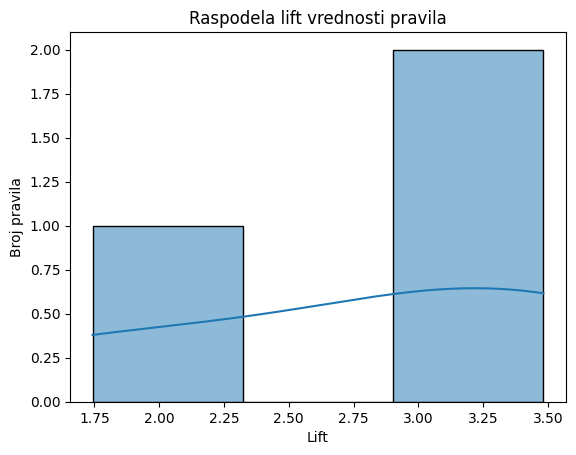

In [18]:

sns.histplot(rules['lift'], kde=True)
plt.xlabel('Lift')
plt.ylabel('Broj pravila')
plt.title('Raspodela lift vrednosti pravila')
plt.show()


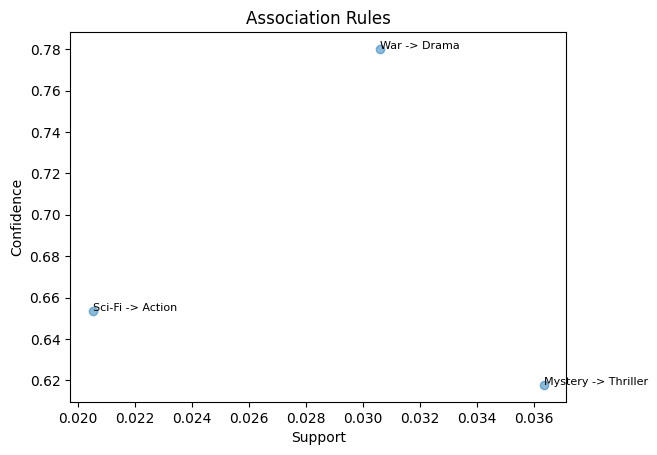

In [19]:
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)

for i, txt in enumerate(rules["antecedents"] + " -> " + rules["consequents"]):
    plt.text(rules["support"][i], rules["confidence"][i], txt, fontsize=8)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

In [20]:

# FP growth
min_support_values = [0.02, 0.03]
min_confidence_values = [0.5, 0.6, 0.7, 0.8, 0.9]

best_avg_lift = 0
best_min_support = 0
best_min_confidence = 0
# Traženje najboljih vrednosti za min_support i min_confidence
for min_support in min_support_values:
    for min_confidence in min_confidence_values:
        frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = min_confidence, num_itemsets=len(frequent_itemsets))
        avg_lift = rules["lift"].mean()
        print(f"Za min_support = {min_support} i min_confidence = {min_confidence} prosecni lift je {avg_lift}.")
        if avg_lift > best_avg_lift:
            best_avg_lift = avg_lift
            best_min_support = min_support
            best_min_confidence = min_confidence

print(f"Najbolji parametri su: min_support = {best_min_support}, i min_confidence = {best_min_confidence}.")


Za min_support = 0.02 i min_confidence = 0.5 prosecni lift je 1.887762111073571.
Za min_support = 0.02 i min_confidence = 0.6 prosecni lift je 2.801204807151955.
Za min_support = 0.02 i min_confidence = 0.7 prosecni lift je 1.742669136599872.
Za min_support = 0.02 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.02 i min_confidence = 0.9 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.5 prosecni lift je 1.639758552812204.
Za min_support = 0.03 i min_confidence = 0.6 prosecni lift je 2.4601988241201895.
Za min_support = 0.03 i min_confidence = 0.7 prosecni lift je 1.742669136599872.
Za min_support = 0.03 i min_confidence = 0.8 prosecni lift je nan.
Za min_support = 0.03 i min_confidence = 0.9 prosecni lift je nan.
Najbolji parametri su: min_support = 0.02, i min_confidence = 0.6.


In [21]:

# Izvršavanje algoritma za zadate vrednosti parametara
frequent_itemsets = fpgrowth(df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=len(frequent_itemsets))
print(rules.head())


           antecedents consequents  antecedent support  consequent support  \
0            (Mystery)  (Thriller)            0.058817            0.194416   
1  (Sci-Fi, Adventure)    (Action)            0.031410            0.187641   
2                (War)     (Drama)            0.039212            0.447649   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.036338    0.617801  3.177729               1.0  0.024902    2.107761   
1  0.020530    0.653595  3.483217               1.0  0.014636    2.345111   
2  0.030589    0.780105  1.742669               1.0  0.013036    2.511880   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.728137  0.167534   0.525563    0.402354  
1       0.736028  0.103413   0.573581    0.381502  
2       0.443560  0.067042   0.601892    0.424219  


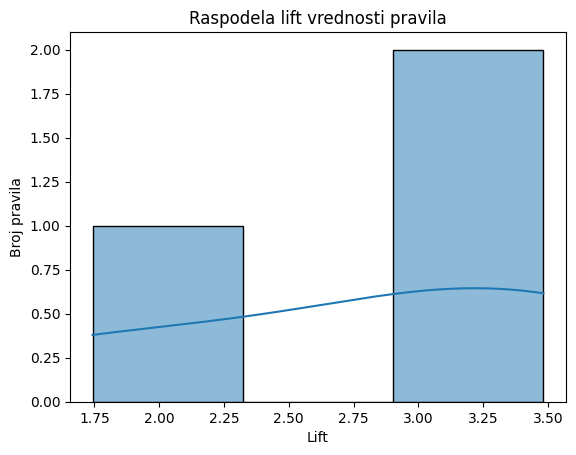

In [22]:

# Raspodela lift vrednosti pravila
sns.histplot(rules['lift'], kde=True)
plt.xlabel('Lift')
plt.ylabel('Broj pravila')
plt.title('Raspodela lift vrednosti pravila')
plt.show()


In [23]:

rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Mystery,Thriller,0.058817,0.194416,0.036338,0.617801,3.177729,1.0,0.024902,2.107761,0.728137,0.167534,0.525563,0.402354
1,Sci-Fi,Action,0.031410,0.187641,0.020530,0.653595,3.483217,1.0,0.014636,2.345111,0.736028,0.103413,0.573581,0.381502
2,War,Drama,0.039212,0.447649,0.030589,0.780105,1.742669,1.0,0.013036,2.511880,0.443560,0.067042,0.601892,0.424219


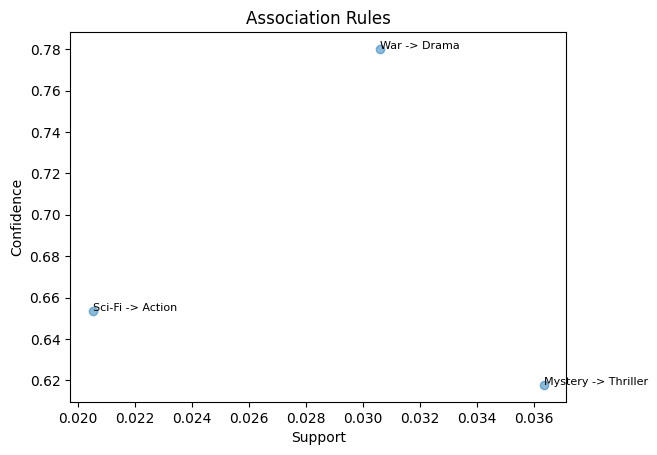

In [24]:

# Vizualizacija asocijativnih pravila
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)

for i, txt in enumerate(rules["antecedents"] + " -> " + rules["consequents"]):
    plt.text(rules["support"][i], rules["confidence"][i], txt, fontsize=8)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()
